In [2]:
import numpy as np
import cv2
from glob import glob
from matplotlib import pyplot as plt
import string
from ipypb import track

In [2]:
min_area = 0.0005
max_area = 0.95

In [3]:
base_path = 'Resources/sean_asl_train/'
alphabet = list(string.ascii_uppercase)
alphabet


['A',
 'B',
 'C',
 'D',
 'E',
 'F',
 'G',
 'H',
 'I',
 'J',
 'K',
 'L',
 'M',
 'N',
 'O',
 'P',
 'Q',
 'R',
 'S',
 'T',
 'U',
 'V',
 'W',
 'X',
 'Y',
 'Z']

In [26]:
print(list(string.ascii_uppercase))

['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']


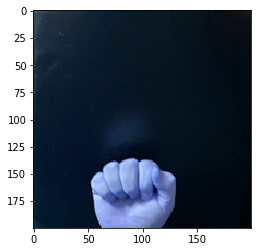

In [4]:
image_vec = cv2.imread(path_contents[0])
plt.imshow(image_vec);

In [4]:
for letter in alphabet:
    img_path = base_path + letter + '/**'
    path_contents = glob(img_path)
    count = 0
    for image in track(path_contents):
        image_vec = cv2.imread(image)
        gray = cv2.cvtColor(image_vec, cv2.COLOR_BGR2GRAY)
        edges = cv2.Canny(gray, threshold1=100, threshold2=300)
        edges = cv2.dilate(edges, None)
        edges = cv2.erode(edges, None)
        contours,hierarchy = cv2.findContours(edges, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
        # Get the area of the image as a comparison
        image_area = image_vec.shape[0] * image_vec.shape[1] 

        # calculate max and min areas in terms of pixels
        max_area = 0.95 * image_area
        min_area = 0.0005 * image_area

        #im2 = cv2.drawContours(im, contours, -1, (0,0,0), 3)
        mask = np.zeros(edges.shape, dtype=np.uint8)
        # Go through and find relevant contours and apply to mask
        for contour in contours:
            # Instead of worrying about all the smaller contours, if the area is smaller than the min, the loop will break
            #print(cv2.contourArea(contour))
            if cv2.contourArea(contour) > min_area and cv2.contourArea(contour) < max_area:
                # Add contour to mask
                mask = cv2.fillConvexPoly(mask, contour, (255))

        # use dilate, erode, and blur to smooth out the mask
        mask = cv2.dilate(mask, None, iterations=10)
        mask = cv2.erode(mask, None, iterations=10)
        mask = cv2.GaussianBlur(mask, (11, 11), 0)
        cv2.imwrite('mask.jpg',mask)
        mask_stack = cv2.imread('mask.jpg')
        mask_stack = mask_stack.astype('float32') / 255.0           
        frame = image_vec.astype('float32') / 255.0
        mask_color = (0.0,0.0,0.0)
        masked = (mask_stack * frame ) + ((1-mask_stack) * mask_color)
        masked = (masked * 255).astype('uint8')
        #cv2.imshow("Foreground", masked)
        count += 1
        cv2.imwrite(f'Resources/masked_sean_train/{letter}/masked{count}.jpg', masked)

 [████████████████████████████████████████████████████████████] 3154/3154 [00:38<00:00, 0.01s/it]

 [████████████████████████████████████████████████████████████] 3504/3504 [00:40<00:00, 0.01s/it]

 [████████████████████████████████████████████████████████████] 3865/3865 [00:42<00:00, 0.01s/it]

 [████████████████████████████████████████████████████████████] 3682/3682 [00:41<00:00, 0.01s/it]

 [████████████████████████████████████████████████████████████] 3652/3652 [00:42<00:00, 0.01s/it]

 [████████████████████████████████████████████████████████████] 3555/3555 [00:41<00:00, 0.01s/it]

 [████████████████████████████████████████████████████████████] 3470/3470 [00:44<00:00, 0.01s/it]

 [████████████████████████████████████████████████████████████] 3333/3333 [00:43<00:00, 0.01s/it]

 [████████████████████████████████████████████████████████████] 3580/3580 [00:46<00:00, 0.01s/it]

 [████████████████████████████████████████████████████████████] 3515/3515 [00:44<00:00, 0.01s/it]

 [████████████████████████████████████████████████████████████] 4600/4600 [00:58<00:00, 0.01s/it]

 [████████████████████████████████████████████████████████████] 3831/3831 [00:51<00:00, 0.01s/it]

 [████████████████████████████████████████████████████████████] 3137/3137 [00:53<00:00, 0.02s/it]

 [████████████████████████████████████████████████████████████] 2926/2926 [00:52<00:00, 0.02s/it]

 [████████████████████████████████████████████████████████████] 3889/3889 [00:50<00:00, 0.01s/it]

 [████████████████████████████████████████████████████████████] 4429/4429 [01:01<00:00, 0.01s/it]

 [████████████████████████████████████████████████████████████] 4541/4541 [00:59<00:00, 0.01s/it]

 [████████████████████████████████████████████████████████████] 4214/4214 [00:57<00:00, 0.01s/it]

 [████████████████████████████████████████████████████████████] 4134/4134 [00:58<00:00, 0.01s/it]

 [████████████████████████████████████████████████████████████] 4576/4576 [01:02<00:00, 0.01s/it]

 [████████████████████████████████████████████████████████████] 5152/5152 [01:07<00:00, 0.01s/it]

 [████████████████████████████████████████████████████████████] 5679/5679 [01:15<00:00, 0.01s/it]

 [████████████████████████████████████████████████████████████] 4745/4745 [01:07<00:00, 0.01s/it]

 [████████████████████████████████████████████████████████████] 4355/4355 [00:49<00:00, 0.01s/it]

 [████████████████████████████████████████████████████████████] 2561/2561 [00:28<00:00, 0.01s/it]

 [████████████████████████████████████████████████████████████] 5494/5494 [01:10<00:00, 0.01s/it]

In [3]:
cap = cv2.VideoCapture(0) # video capture source camera (Here webcam of laptop) 


while(True):
    ret,frame = cap.read() # return a single frame in variable `frame`
    if ret == True:
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        edges = cv2.Canny(gray, threshold1=15, threshold2=150)
        edges = cv2.dilate(edges, None)
        edges = cv2.erode(edges, None)
        contours,hierarchy = cv2.findContours(edges, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
        # Get the area of the image as a comparison
        image_area = frame.shape[0] * frame.shape[1] 

        # calculate max and min areas in terms of pixels
        max_area = 0.95 * image_area
        min_area = 0.0005 * image_area

        #im2 = cv2.drawContours(im, contours, -1, (0,0,0), 3)
        mask = np.zeros(edges.shape, dtype=np.uint8)
        # Go through and find relevant contours and apply to mask
        for contour in contours:
            # Instead of worrying about all the smaller contours, if the area is smaller than the min, the loop will break
            #print(cv2.contourArea(contour))
            if cv2.contourArea(contour) > min_area and cv2.contourArea(contour) < max_area:
                # Add contour to mask
                mask = cv2.fillConvexPoly(mask, contour, (255))

        # use dilate, erode, and blur to smooth out the mask
        mask = cv2.dilate(mask, None, iterations=10)
        mask = cv2.erode(mask, None, iterations=10)
        mask = cv2.GaussianBlur(mask, (21, 21), 0)
        cv2.imwrite('mask.jpg',mask)
        mask_stack = cv2.imread('mask.jpg')
        mask_stack = mask_stack.astype('float32') / 255.0           
        frame = frame.astype('float32') / 255.0
        mask_color = (0.0,0.0,0.0)
        masked = (mask_stack * frame ) + ((1-mask_stack) * mask_color)
        masked = (masked * 255).astype('uint8')
        cv2.imshow("Foreground", masked)
        if cv2.waitKey(60) & 0xFF == ord('y'): #save on pressing 'y' 
            cv2.imwrite('c1.jpg',masked)
            break
    else:
        break
cv2.destroyAllWindows()
cap.release()

In [2]:
cap = cv2.VideoCapture(0) # video capture source camera (Here webcam of laptop) 
ret,frame = cap.read() # return a single frame in variable `frame`

while(True):
    cv2.imshow('img1',frame) #display the captured image
    if cv2.waitKey(1) & 0xFF == ord('y'): #save on pressing 'y' 
        cv2.imwrite('c1.png',frame)
        cv2.destroyAllWindows()
        break

cap.release()

In [32]:
img_path = "American Sign Language Test Files/resized pics/" + "**"
path_contents = glob(img_path)
count = 2
for image in track(path_contents):
    image_vec = cv2.imread(image)
    gray = cv2.cvtColor(image_vec, cv2.COLOR_BGR2GRAY)
    edges = cv2.Canny(gray, threshold1=50, threshold2=150)
    edges = cv2.dilate(edges, None)
    edges = cv2.erode(edges, None)
    contours,hierarchy = cv2.findContours(edges, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
    # Get the area of the image as a comparison
    image_area = image_vec.shape[0] * image_vec.shape[1] 

    # calculate max and min areas in terms of pixels
    max_area = 0.95 * image_area
    min_area = 0.0005 * image_area

    #im2 = cv2.drawContours(im, contours, -1, (0,0,0), 3)
    mask = np.zeros(edges.shape, dtype=np.uint8)
    # Go through and find relevant contours and apply to mask
    for contour in contours:
        # Instead of worrying about all the smaller contours, if the area is smaller than the min, the loop will break
        #print(cv2.contourArea(contour))
        if cv2.contourArea(contour) > min_area and cv2.contourArea(contour) < max_area:
            # Add contour to mask
            mask = cv2.fillConvexPoly(mask, contour, (255))

    # use dilate, erode, and blur to smooth out the mask
    mask = cv2.dilate(mask, None, iterations=10)
    mask = cv2.erode(mask, None, iterations=10)
    mask = cv2.GaussianBlur(mask, (11, 11), 0)
    cv2.imwrite('mask.jpg',mask)
    mask_stack = cv2.imread('mask.jpg')
    mask_stack = mask_stack.astype('float32') / 255.0           
    frame = image_vec.astype('float32') / 255.0
    mask_color = (0.0,0.0,0.0)
    masked = (mask_stack * frame ) + ((1-mask_stack) * mask_color)
    masked = (masked * 255).astype('uint8')
    #cv2.imshow("Foreground", masked)
    count += 1
    cv2.imwrite(f'Resources/test/test{count}.jpg', masked)

 [████████████████████████████████████████████████████████████] 26/26 [00:00<00:00, 0.00s/it]

In [33]:
img_path = "Test AM/resized pics AM/" + "**"
path_contents = glob(img_path)

for image in track(path_contents):
    image_vec = cv2.imread(image)
    gray = cv2.cvtColor(image_vec, cv2.COLOR_BGR2GRAY)
    edges = cv2.Canny(gray, threshold1=100, threshold2=300)
    edges = cv2.dilate(edges, None)
    edges = cv2.erode(edges, None)
    contours,hierarchy = cv2.findContours(edges, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
    # Get the area of the image as a comparison
    image_area = image_vec.shape[0] * image_vec.shape[1] 

    # calculate max and min areas in terms of pixels
    max_area = 0.95 * image_area
    min_area = 0.0005 * image_area

    #im2 = cv2.drawContours(im, contours, -1, (0,0,0), 3)
    mask = np.zeros(edges.shape, dtype=np.uint8)
    # Go through and find relevant contours and apply to mask
    for contour in contours:
        # Instead of worrying about all the smaller contours, if the area is smaller than the min, the loop will break
        #print(cv2.contourArea(contour))
        if cv2.contourArea(contour) > min_area and cv2.contourArea(contour) < max_area:
            # Add contour to mask
            mask = cv2.fillConvexPoly(mask, contour, (255))

    # use dilate, erode, and blur to smooth out the mask
    mask = cv2.dilate(mask, None, iterations=10)
    mask = cv2.erode(mask, None, iterations=10)
    mask = cv2.GaussianBlur(mask, (11, 11), 0)
    cv2.imwrite('mask.jpg',mask)
    mask_stack = cv2.imread('mask.jpg')
    mask_stack = mask_stack.astype('float32') / 255.0           
    frame = image_vec.astype('float32') / 255.0
    mask_color = (0.0,0.0,0.0)
    masked = (mask_stack * frame ) + ((1-mask_stack) * mask_color)
    masked = (masked * 255).astype('uint8')
    #cv2.imshow("Foreground", masked)
    count += 1
    cv2.imwrite(f'Resources/test/test{count}.jpg', masked)

 [████████████████████████████████████████████████████████████] 85/85 [00:00<00:00, 0.00s/it]